# Exploratory Data Analysis on Student's Academic Performance

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
data=pd.read_csv('xAPI-Edu-Data.csv')
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [5]:
data.info()                     #Get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## The students are classified into three numerical intervals based on their total grade/mark:
## L=0-69
## M=70-89
## H=90-100

## Visualize Categorical features using countplot

<AxesSubplot:xlabel='Semester', ylabel='count'>

<Figure size 432x288 with 0 Axes>

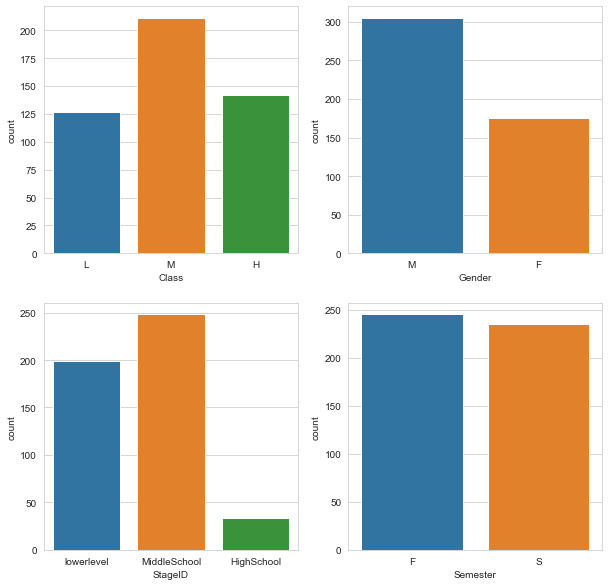

In [101]:
#Visualize Categorical features using countplot

plt.figure(1)
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(x='Class', data=data, order=['L','M','H'])

plt.subplot(222)
ax=sns.countplot(x='gender', data=data,order=['M','F'])
ax.set(xlabel='Gender')

plt.subplot(223)
sns.countplot(x='StageID', data=data)

plt.subplot(224)
sns.countplot(x='Semester', data=data)

<AxesSubplot:xlabel='Topic', ylabel='count'>

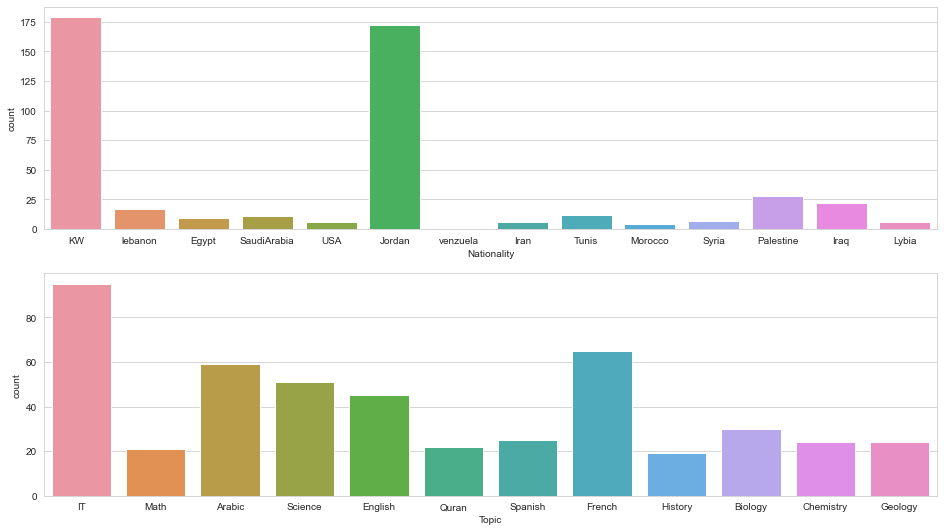

In [102]:
plt.figure(figsize=(16,9))
plt.subplot(211)
a=sns.countplot(x='NationalITy', data=data)
a.set(xlabel=('Nationality'))

plt.subplot(212)
sns.countplot(x='Topic', data=data)

## Next I will look at some categorical features in relation to each other, to see what insights that could possibly read

<AxesSubplot:xlabel='gender', ylabel='count'>

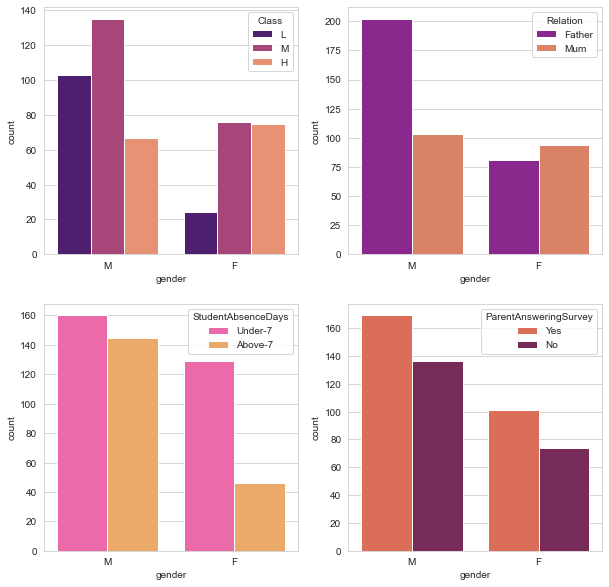

In [103]:
fig,axarr=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', data=data, hue='Class', ax=axarr[0,0],hue_order=['L','M','H'],palette='magma')
sns.countplot(x='gender', data=data, hue='Relation', ax=axarr[0,1],palette='plasma')
sns.countplot(x='gender', data=data, hue='StudentAbsenceDays', ax=axarr[1,0],palette='spring')
sns.countplot(x='gender', data=data, hue='ParentAnsweringSurvey', ax=axarr[1,1],palette='rocket_r')

###### -In the case of girls, mothers seem to be more interested in their education than fathers
###### -Girls had much better attendance than boys

[Text(0.5, 1.0, 'Gender VS Nationality')]

<Figure size 432x288 with 0 Axes>

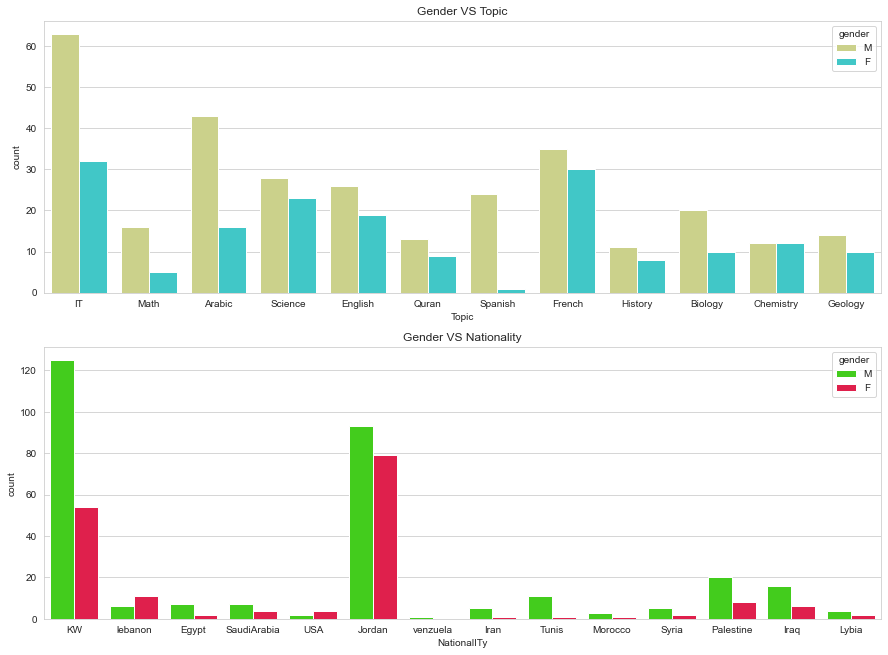

In [104]:
plt.figure(1)
plt.figure(figsize=(15,11))
plt.subplot(211)
a=sns.countplot(x='Topic', data=data, hue='gender',palette='rainbow_r')
a.set(title='Gender VS Topic')

plt.subplot(212)
b=sns.countplot(x='NationalITy', data=data, hue='gender',palette='prism')
b.set(title='Gender VS Nationality')

###### -No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects
###### -Gender disparity holds even at a country level

## Now I am moving on to visualizing categorical features with numerical features.

#### Visited resources        = How many times the student visits a course content(numeric:0-100)
#### Announcements View = How many times the student checks the new announcements(numeric:0-100)
#### Raised hand                 = How many times the student raises his/her hand on classroom (numeric:0-100)
#### Discussion                   = How many times the student participate in group discussions(numeric:0-100)

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

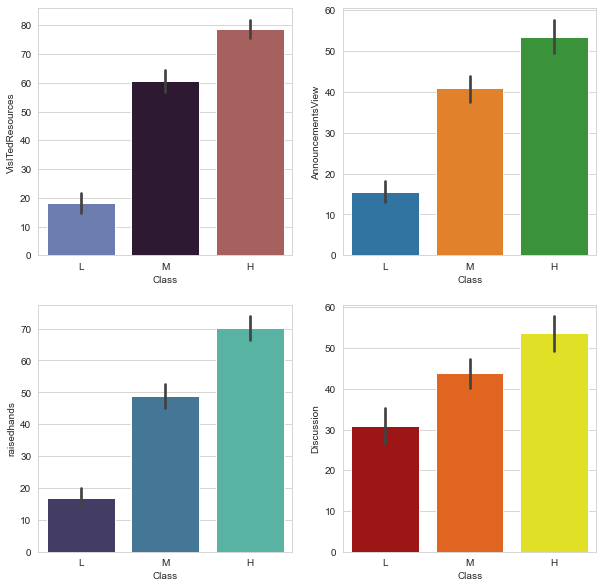

In [122]:
fig,axarr=plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0],palette='twilight')
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1],palette='tab10')
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0],palette='mako')
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1],palette='hot')

###### -As expected, those who participated more (higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better!!

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

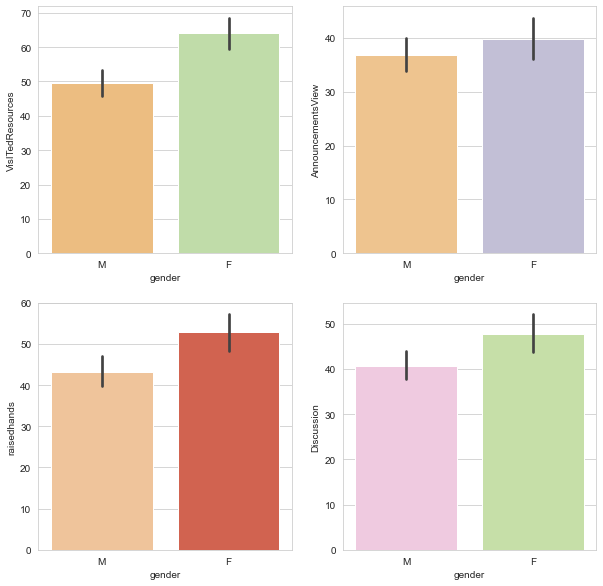

In [139]:
fig,axarr=plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='gender', y='VisITedResources', data=data, palette='Spectral', ax=axarr[0,0])
sns.barplot(x='gender', y='AnnouncementsView', data=data, palette='PuOr', ax=axarr[0,1])
sns.barplot(x='gender', y='raisedhands', data=data, palette='OrRd', ax=axarr[1,0])
sns.barplot(x='gender', y='Discussion', data=data, palette='PiYG', ax=axarr[1,1])

###### -We Can Clearly see that Girls are Performing better in classroom

## There are various other plots that help visualize Categorical vs Numerical data better.

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

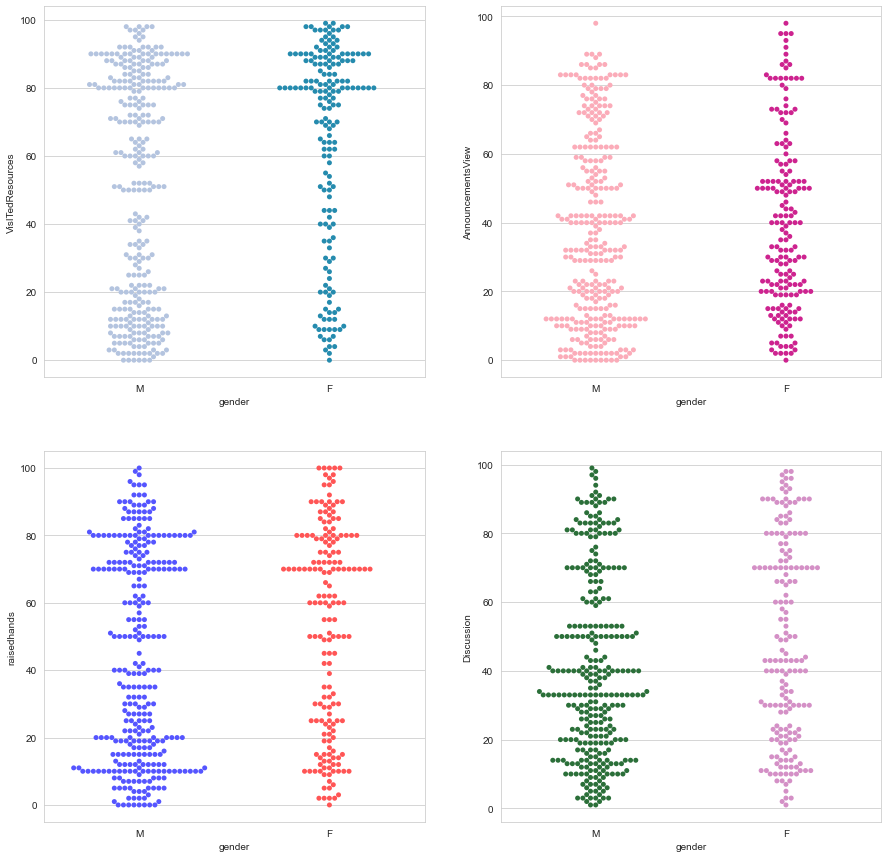

In [147]:
fig,axarr=plt.subplots(2,2,figsize=(15,15))
sns.swarmplot(x='gender', y='VisITedResources', data=data, palette='PuBuGn', ax=axarr[0,0])
sns.swarmplot(x='gender', y='AnnouncementsView', data=data, palette='RdPu', ax=axarr[0,1])
sns.swarmplot(x='gender', y='raisedhands', data=data, palette='seismic', ax=axarr[1,0])
sns.swarmplot(x='gender', y='Discussion', data=data, palette='cubehelix', ax=axarr[1,1])

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

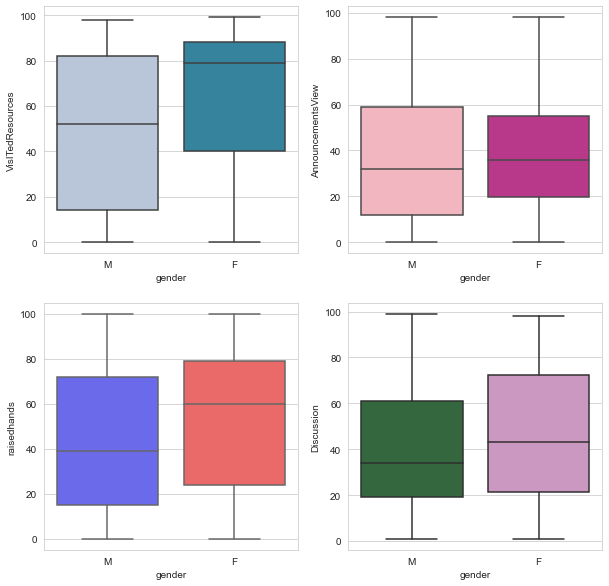

In [170]:
fig,axarr=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='gender', y='VisITedResources', data=data, palette='PuBuGn', ax=axarr[0,0])
sns.boxplot(x='gender', y='AnnouncementsView', data=data, palette='RdPu', ax=axarr[0,1])
sns.boxplot(x='gender', y='raisedhands', data=data, palette='seismic', ax=axarr[1,0])
sns.boxplot(x='gender', y='Discussion', data=data, palette='cubehelix', ax=axarr[1,1])

###### -The plots above tell us that visiting the resources may not be as sure a path to performing well as discussions

<AxesSubplot:xlabel='Semester', ylabel='Discussion'>

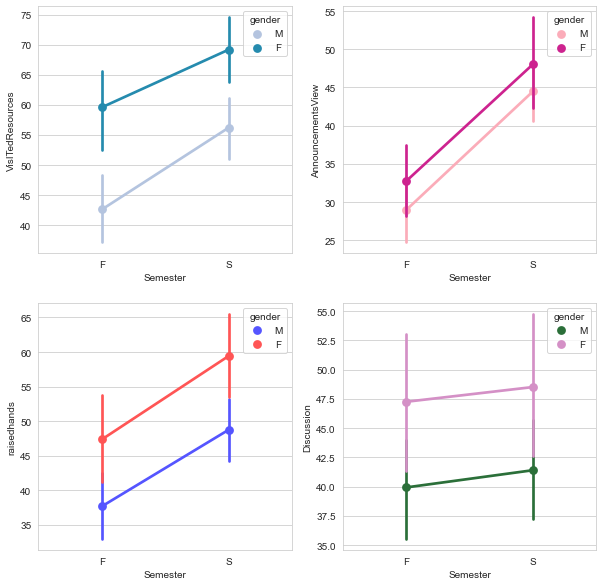

In [156]:
fig,axarr=plt.subplots(2,2,figsize=(10,10))
sns.pointplot(x='Semester', y='VisITedResources',hue='gender', data=data, palette='PuBuGn', ax=axarr[0,0])
sns.pointplot(x='Semester', y='AnnouncementsView',hue='gender', data=data, palette='RdPu', ax=axarr[0,1])
sns.pointplot(x='Semester', y='raisedhands',hue='gender', data=data, palette='seismic', ax=axarr[1,0])
sns.pointplot(x='Semester', y='Discussion',hue='gender', data=data, palette='cubehelix', ax=axarr[1,1])

###### -In the case of both visiting resources and viewing announcements, students were more vigilant in the second semester, perhaps that last minute need to boost your final grade.

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Discussion'>

<Figure size 432x288 with 0 Axes>

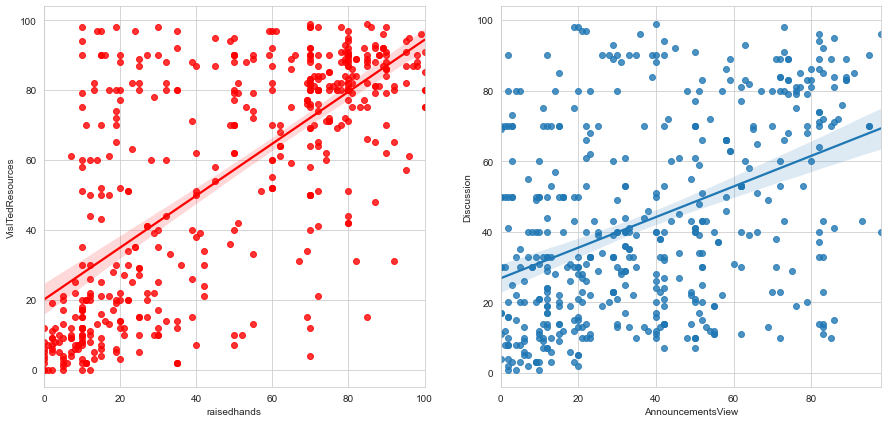

In [169]:
plt.figure(1)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.regplot(x='raisedhands', y='VisITedResources', data=data, color='r')

plt.subplot(122)
sns.regplot(x='AnnouncementsView', y='Discussion', data=data)


###### -There does not appear to be much of a linear relationship between the numerical features.